In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNet
import cv2

In [ ]:
model = MobileNet(weights='imagenet',include_top=True)

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [ ]:
!wget https://cnet3.cbsistatic.com/img/EQldQf3EJ53OV6TjQaofy_rC1gQ=/940x0/2019/01/11/21c3dece-7bbb-4fba-8fca-10c894b8b39a/starship.jpg


--2020-10-05 04:45:02--  https://cnet3.cbsistatic.com/img/EQldQf3EJ53OV6TjQaofy_rC1gQ=/940x0/2019/01/11/21c3dece-7bbb-4fba-8fca-10c894b8b39a/starship.jpg
Resolving cnet3.cbsistatic.com (cnet3.cbsistatic.com)... 151.101.53.188, 2a04:4e42:d::444
Connecting to cnet3.cbsistatic.com (cnet3.cbsistatic.com)|151.101.53.188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95619 (93K) [image/jpeg]
Saving to: ‘starship.jpg’

starship.jpg        100%[===================>]  93.38K  --.-KB/s    in 0.02s   

2020-10-05 04:45:03 (5.06 MB/s) - ‘starship.jpg’ saved [95619/95619]



In [ ]:
new=cv2.imread('/content/starship.jpg')

In [ ]:
new.shape

(900, 1200, 3)

In [ ]:
Y=cv2.resize(new, (224,224))

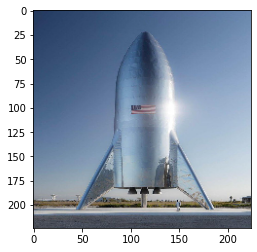

In [ ]:
plt.imshow(cv2.cvtColor(Y, cv2.COLOR_BGR2RGB))

In [ ]:
Y=np.reshape(Y,(-1,224,224,3))

In [ ]:
Y=(Y/127.5)-1

In [ ]:
y_predict=model.predict(Y)

In [ ]:
np.argmax(y_predict)

871

In [ ]:
from tensorflow.keras.applications.mobilenet import decode_predictions

In [ ]:
decode_predictions(y_predict, top=5)

[[('n04483307', 'trimaran', 0.715296),
  ('n02981792', 'catamaran', 0.14316306),
  ('n04266014', 'space_shuttle', 0.032349557),
  ('n03344393', 'fireboat', 0.028389476),
  ('n04612504', 'yawl', 0.027503036)]]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


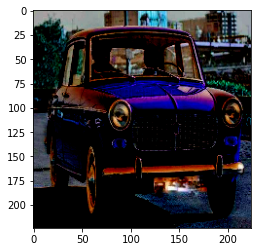

In [ ]:
plt.imshow(Y[0])

In [ ]:
!wget https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497&w=1600&h=900

--2020-10-05 04:43:37--  https://image.cnbcfm.com/api/v1/image/105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497
Resolving image.cnbcfm.com (image.cnbcfm.com)... 23.64.223.164
Connecting to image.cnbcfm.com (image.cnbcfm.com)|23.64.223.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272588 (266K) [image/jpeg]
Saving to: ‘105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497’

105992231-156166746 100%[===================>] 266.20K  --.-KB/s    in 0.03s   

2020-10-05 04:43:37 (7.53 MB/s) - ‘105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497’ saved [272588/272588]



In [ ]:
img=cv2.imread('/content/105992231-1561667465295gettyimages-521697453.jpeg?v=1561667497')
img=cv2.resize(img,(224,224))

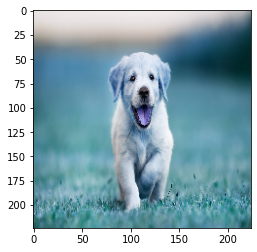

In [ ]:
plt.imshow(img)

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
#x = image.img_to_array(img)

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
x = x[:,:,:,:3] # maybe an alpha channel
pred = model.predict(x)

In [ ]:
decode_predictions(pred, top=5)

[[('n02099712', 'Labrador_retriever', 0.43383306),
  ('n02099601', 'golden_retriever', 0.25834277),
  ('n02104029', 'kuvasz', 0.21962704),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.022170017),
  ('n04409515', 'tennis_ball', 0.017084837)]]